/home/yanzhiwei/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


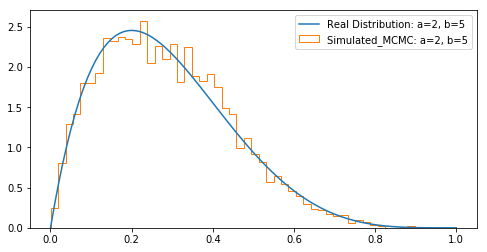

In [5]:
# -*- coding: utf-8 -*-

import random
import numpy as np
import pylab as pl
import scipy.special as ss

# 完整的beta分布概率密度函数
def beta(a, b, i):
    e1 = ss.gamma(a + b)
    e2 = ss.gamma(a)
    e3 = ss.gamma(b)
    e4 = i ** (a - 1)
    e5 = (1 - i) ** (b - 1)
    return (e1/(e2*e3)) * e4 * e5

# beta分布概率密度函数去掉前面的常数项之后的形式
def beta_s(a,b,i):
    return i**(a-1)*(1-i)**(b-1)

# mcmc模拟
def beta_mcmc(N_hops,a,b):
    states = []
    cur = random.uniform(0,1) # 初始化状态
    for i in range(0,N_hops):
        states.append(cur)
        next = random.uniform(0,1) #从原来的迁移矩阵P采样，这里假设P是一个基于均匀分布的迁移矩阵
        #计算接受率，因为beta分布的常数项会抵消，所以用不带常数项的形式，能大幅提速。而且P是均匀分布，所以也相互抵消了
        ap = min(beta_s(a,b,next)/beta_s(a,b,cur),1) 
        if random.uniform(0,1) < ap: #随机采样决定是否跳转
            cur = next
    return states[-10000:] #取最后的一部分状态，保证已经收敛

#可视化
def plot_beta(a, b):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:1:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(beta(a, b, i))
    pl.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
    pl.hist(beta_mcmc(1000000,a,b),normed=True,bins=50, histtype='step',
            label="Simulated_MCMC: a="+str(a)+", b="+str(b))
    pl.legend()
    pl.show()

pl.rcParams['figure.figsize'] = (8.0, 4.0)
plot_beta(2, 5)


In [4]:
pl.show()